In [1]:
# config
# config_name = 'config.yaml'
# config_name = 'LSTCrPPG.yaml'
config_name = 'PhysNet.yaml'
force_clear_train_cache = False
force_clear_test_cache = False
num_epochs = 50

In [2]:
from singleton_pattern import load_model,load_config
from singleton_pattern.load_dataset_reader import get_train_reader,get_test_reader
from singleton_pattern.load_data_generator import get_train_data_generator,get_test_data_generator
from util.cache import Cache
load_config.init_config(config_name)

from util.torch_info import print_info
print_info()
non_dnn_method_list = load_config.get_non_dnn_method_list()

config_hash = load_config.get_config_hash()
print(f'config_hash:{config_hash}')

config = load_config.get_config()
model = load_model.get_model()

print(f'Method and Preprocessing Name: {config["method"]}')
# print(f'Model:\n------------------\n{model}\n------------------')

CUDA:
---------------------------
PyTorch supports GPU and currently has 1 CUDA devices available.
The current default CUDA device is: NVIDIA GeForce RTX 3090
---------------------------
config_hash:9633c710ba3cbd14212e0d7fe4ad9bc1e82ec7aa30de71055fb3f8cad6063c35
Method and Preprocessing Name: PhysNet


In [3]:
import datetime
dataloader = None
def load_train_loader():
    global dataloader
    if dataloader != None:
        return dataloader
    train_reader = get_train_reader()
    print(f'train_reader: {train_reader.loader_name}')
    data = train_reader.load_data()
    tensor_data_generator = get_train_data_generator()
    dataloader = tensor_data_generator.get_tensor_dataloader(data,force_clear_cache=force_clear_train_cache)
    return dataloader
def train():
    if config['method'] in non_dnn_method_list: 
        print('non train')
        return
    dataloader = load_train_loader()
    start_time = datetime.datetime.now()
    model.train_model(dataloader,num_epochs)
    runtime = datetime.datetime.now() - start_time
    hours, remainder = divmod(runtime.total_seconds(), 3600)
    minutes, seconds = divmod(remainder, 60)
    print(f"train total time:  {int(hours)}h:{int(minutes)}m:{int(seconds)}s")
# run train
train()

train_reader: UBFC_Phys
Root Path:D:\BaiduNetdiskDownload\UBFC-PHYs_1-12
Start Reading UBFC_Phys Dataset Directory...


Progress:   0%|          | 0/12 [00:00<?, ?it/s]

cache\9633c710ba3cbd14212e0d7fe4ad9bc1e82ec7aa30de71055fb3f8cad6063c35\train
dataset size: 1056
start training...
cache\9633c710ba3cbd14212e0d7fe4ad9bc1e82ec7aa30de71055fb3f8cad6063c35\model


Progress:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch [1/50], Loss: 0.9909
Epoch [2/50], Loss: 1.0796
Epoch [3/50], Loss: 1.1112
Epoch [4/50], Loss: 1.1855
Epoch [5/50], Loss: 1.2425
Epoch [6/50], Loss: 1.2167
Epoch [7/50], Loss: 1.2364
Epoch [8/50], Loss: 1.1755
Epoch [9/50], Loss: 1.4484
Epoch [10/50], Loss: 1.1047
Epoch [11/50], Loss: 1.0970
Epoch [12/50], Loss: 1.1253
Epoch [13/50], Loss: 1.0675
Epoch [14/50], Loss: 0.3335
Epoch [15/50], Loss: 1.1303
Epoch [16/50], Loss: 0.4725
Epoch [17/50], Loss: 0.8780
Epoch [18/50], Loss: 1.3922
Epoch [19/50], Loss: 0.6219
Epoch [20/50], Loss: 0.7939
Epoch [21/50], Loss: 1.0066
Epoch [22/50], Loss: 1.0259
Epoch [23/50], Loss: 1.0006
Epoch [24/50], Loss: 1.0107
Epoch [25/50], Loss: 0.5659
Epoch [26/50], Loss: 1.6542
Epoch [27/50], Loss: 0.6557
Epoch [28/50], Loss: 0.3646
Epoch [29/50], Loss: 0.5341
Epoch [30/50], Loss: 0.5509
Epoch [31/50], Loss: 0.5335
Epoch [32/50], Loss: 0.6593
Epoch [33/50], Loss: 0.8868
Epoch [34/50], Loss: 0.8303
Epoch [35/50], Loss: 0.5402
Epoch [36/50], Loss: 0.7083
E

Test Loader: UBFC_Phys
Root Path:D:\BaiduNetdiskDownload\UBFC-PHYs_1-12
Start Reading UBFC_Phys Dataset Directory...


Progress:   0%|          | 0/12 [00:00<?, ?it/s]

cache\9633c710ba3cbd14212e0d7fe4ad9bc1e82ec7aa30de71055fb3f8cad6063c35\test
dataset size: 1056


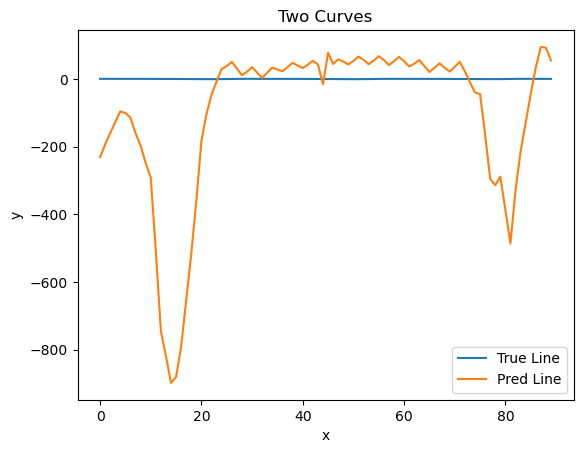

In [14]:
import matplotlib.pyplot as plt
import numpy as np
test_reader = get_test_reader()
tensor_data_generator = get_test_data_generator()
print(f'Test Loader: {test_reader.loader_name}')
data = test_reader.load_data()
test_dataloader = tensor_data_generator.get_tensor_dataloader(data,force_clear_cache=force_clear_test_cache)
# test
if 'model' not in dir():
    cache = Cache('model')
    model = cache.read_model()
model.eval()
i = 0
for batch_X, batch_y in test_dataloader:
    index_n = 3
    if i == index_n:
        plt.title("Two Curves")
        plt.xlabel("T")
        plt.ylabel("BVP")
        pred = model(batch_X)
        true_data = np.array(batch_y.view(-1).numpy())
        pred_data = np.array(pred.detach().view(-1).numpy())
        true_data = true_data = (true_data - true_data.mean())/true_data.std()
        pred_data = pred_data = (pred_data - pred_data.mean())/pred_data.std()
        plt.plot(true_data, label="True Line")
        plt.plot(pred_data, label="Pred Line")
        plt.legend()
        plt.show()
    if i > index_n:
        break
    i+=1

# 评价指标


In [ ]:
from method.LSTCrPPG import LSTCrPPG
from method.PhysNet import PhysNet
import torch
input_data = torch.randn(3, 3, 160, 128, 128)
model = PhysNet()
model.eval()
model(input_data)


In [15]:
batch_y

tensor([[0.6241, 0.5603, 0.4978, 0.4363, 0.3698, 0.2879, 0.1945, 0.1267, 0.1323,
         0.2339, 0.4116, 0.6184, 0.8052, 0.9385, 1.0000, 0.9924, 0.9416, 0.8841,
         0.8458, 0.8275, 0.8166, 0.8008, 0.7749, 0.7377, 0.6891, 0.6298, 0.5637,
         0.4960, 0.4294, 0.3616, 0.2862, 0.1963, 0.0955, 0.0119, 0.0000, 0.0933,
         0.2756, 0.4962, 0.7021, 0.8579, 0.9447, 0.9653, 0.9388, 0.8970, 0.8664,
         0.8555, 0.8535, 0.8473, 0.8303, 0.8001, 0.7536, 0.6884, 0.6134, 0.5422,
         0.4807, 0.4199, 0.3437, 0.2435, 0.1329, 0.0503, 0.0473, 0.1535, 0.3487,
         0.5675, 0.7594, 0.8968, 0.9656, 0.9641, 0.9177, 0.8703, 0.8471, 0.8428,
         0.8374, 0.8210, 0.7994, 0.7702, 0.7214, 0.6488, 0.5661, 0.4935, 0.4336,
         0.3705, 0.2859, 0.1774, 0.0759, 0.0405, 0.1096, 0.2735, 0.4837, 0.6858]])